# Factor analyses


In this notebook we analyse the results of the performed ablation study to identify the factors used by the CNN model to discriminate between cells of the different overexpression and the control condition.

---


## Environmental setup

In [8]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sys.path.append("../../../../")

from src.utils.notebooks.images.exp_evaluation import LogAnalyzer
from src.utils.basic.io import get_file_list

mpl.rcParams["figure.dpi"] = 600

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [9]:
def get_factor_analyses_results(log_files):
    result = {
        "model": [],
        "fold": [],
        "train_acc": [],
        "val_acc": [],
        "test_acc": [],
        "train_bacc": [],
        "val_bacc": [],
        "test_bacc": [],
    }

    for file in log_files:
        dirs = file.split("/")
        model = dirs[-3]
        fold = dirs[-2]

        la = LogAnalyzer(file)
        la.analyze()

        result["model"].append(model)
        result["fold"].append(fold)
        result["train_acc"].append(la.best_train_acc)
        result["train_bacc"].append(la.best_train_bacc)
        result["val_acc"].append(la.best_val_acc)
        result["val_bacc"].append(la.best_val_bacc)
        result["test_acc"].append(la.test_acc)
        result["test_bacc"].append(la.test_bacc)
    return pd.DataFrame(result)

<IPython.core.display.Javascript object>

---

## Read in data

In [10]:
root_dir = "../../../../data/experiments/rohban/images/factor_analyses/setups"
all_log_files = get_file_list(root_dir, file_type_filter=".log")

<IPython.core.display.Javascript object>

In [11]:
results = get_factor_analyses_results(all_log_files)
results.head()

,model,fold,train_acc,val_acc,test_acc,train_bacc,val_bacc,test_bacc
0,all_resnet_area_nuc,fold_0,0.091004,0.068801,0.069354,0.114752,0.080841,0.079410
1,all_resnet_area_nuc,fold_1,0.094027,0.067183,0.069763,0.124998,0.079292,0.080932
2,all_resnet_area_nuc,fold_2,0.098242,0.069331,0.066592,0.131748,0.078768,0.074626
3,all_resnet_area_nuc,fold_3,0.088982,0.061649,0.073343,0.113269,0.075683,0.086459
4,all_resnet_bin_nuc,fold_0,0.049938,0.043793,0.043208,0.058641,0.048957,0.046728


<IPython.core.display.Javascript object>

In [13]:
input_dict = {
    "all_resnet_bin_nuc": "Binarized single-nucleus images",
    "all_resnet_nuc": "Single-nucleus images",
    "all_resnet_area_nuc": "Size-filtered single-nucleus images",
    "all_resnet_int_nuc": "Hoechst intensity-filtered \nsingle-nucleus images",
    "all_resnet_bin_nuc_bin_region": "Binarized single-nucleus and\n region images",
    "all_resnet_nuc_region": "Single-nucleus and region images",
}
results["input"] = results.model.map(input_dict)

<IPython.core.display.Javascript object>

---
## Visualization

<ipython-input-21-f37eb97563c9>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=list(results.groupby("input").mean().sort_values("test_bacc").index),


(0.0, 0.3)

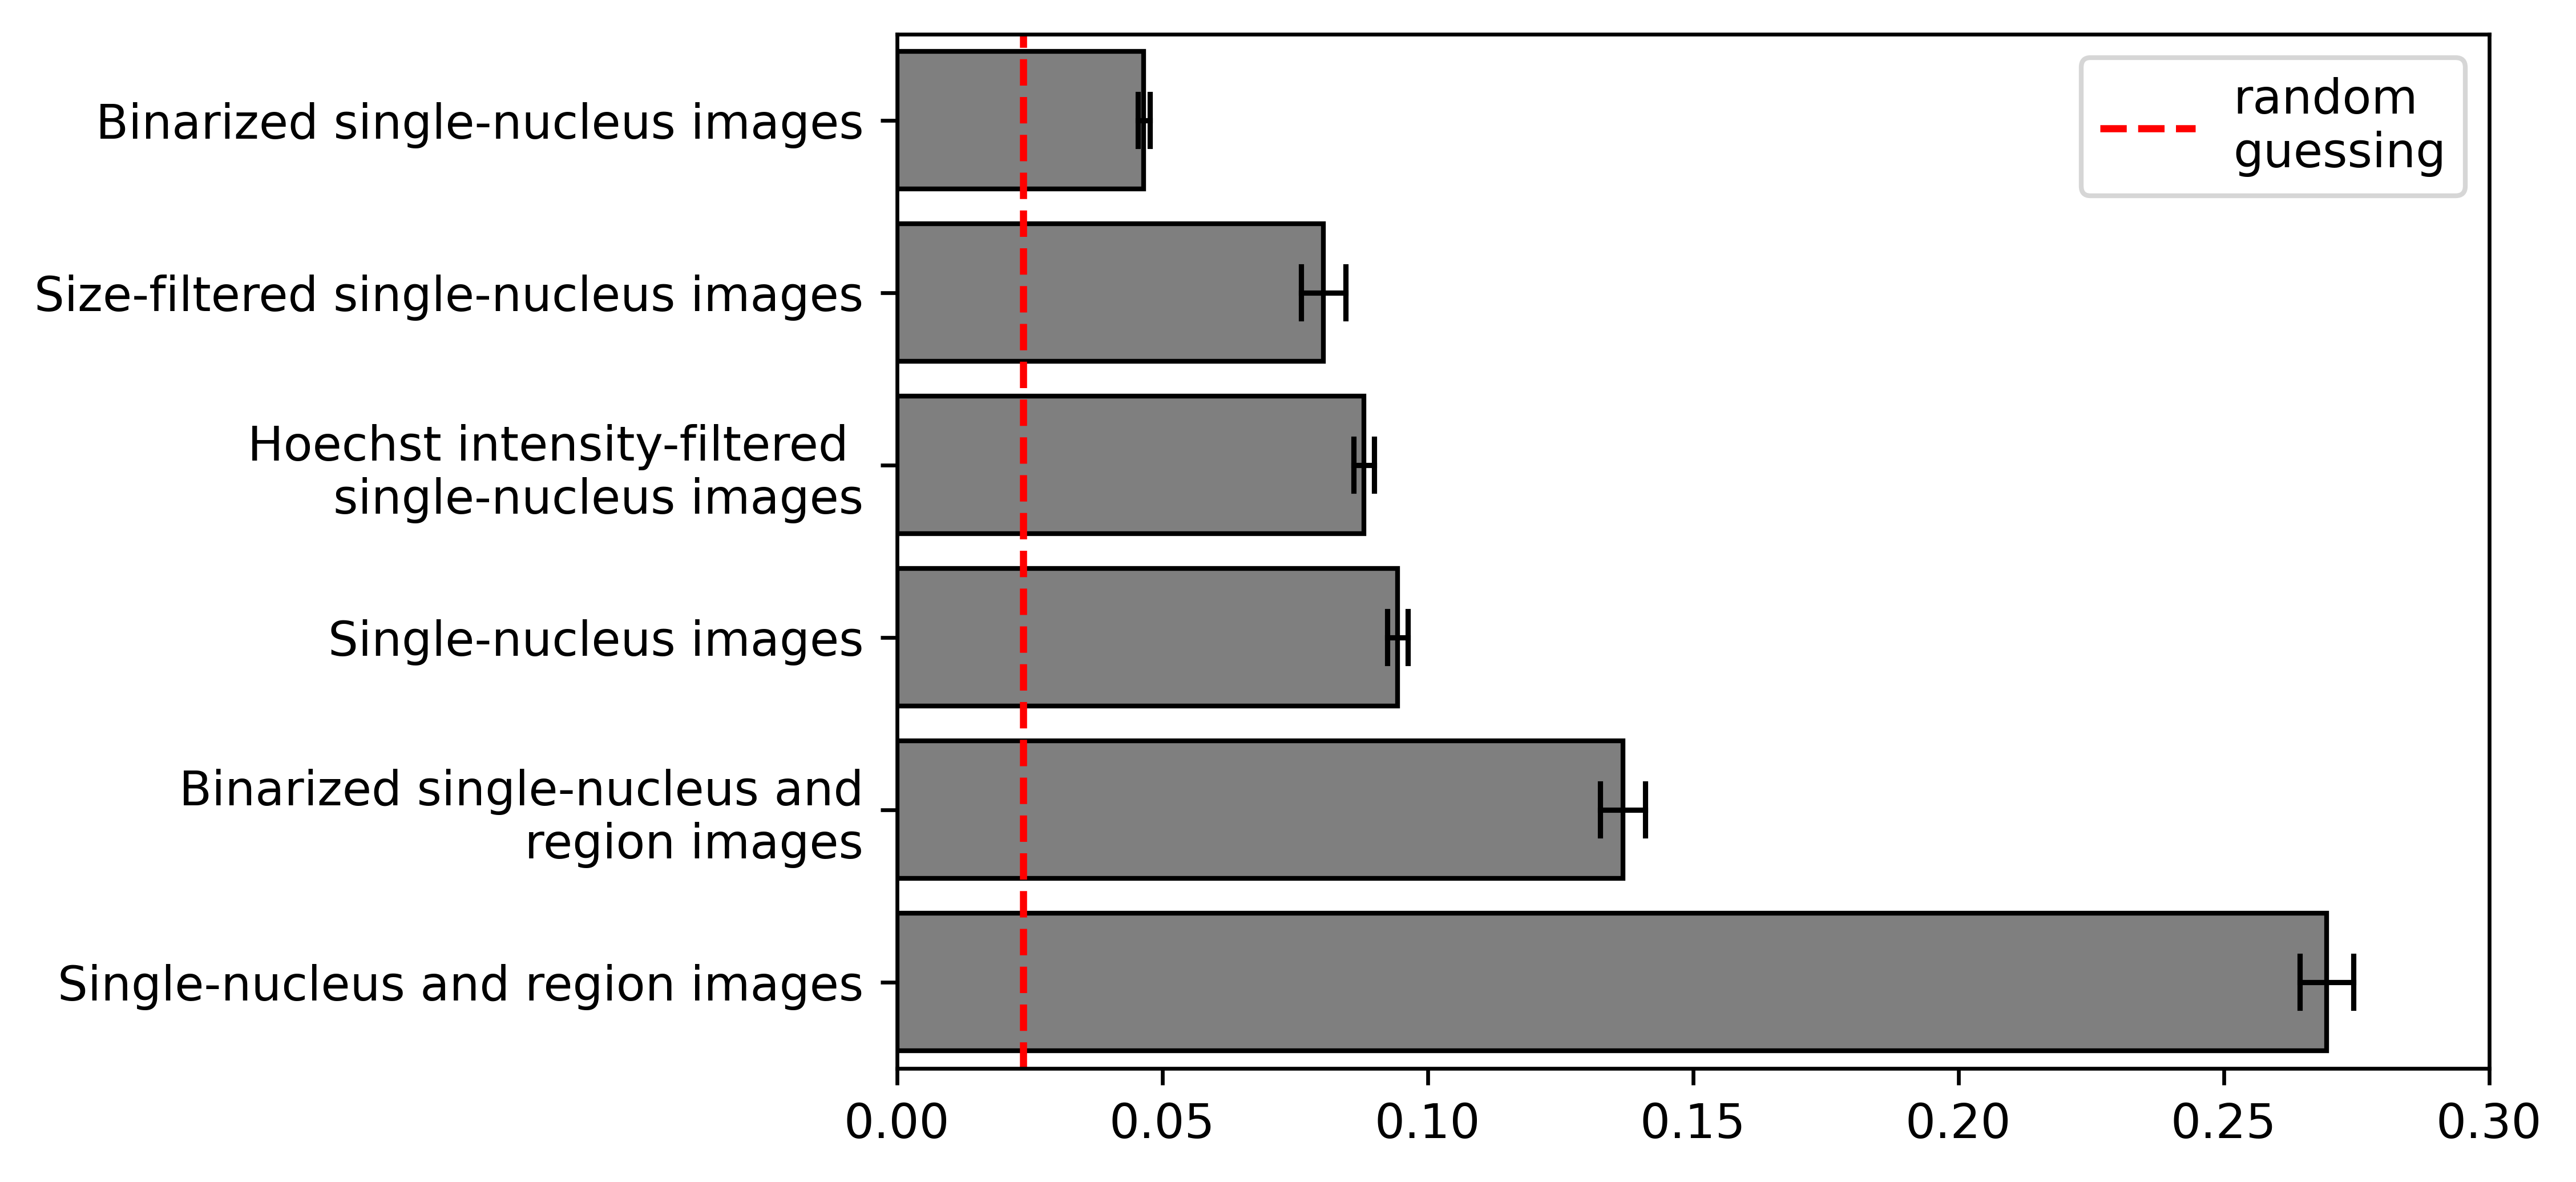

<IPython.core.display.Javascript object>

In [21]:
fig, ax = plt.subplots(figsize=[6, 4])
ax = sns.barplot(
    data=results,
    y="input",
    x="test_bacc",
    ci="sd",
    capsize=0.3,
    errcolor="k",
    edgecolor="k",
    errwidth=1.1,
    palette=["tab:gray"],
    order=list(results.groupby("input").mean().sort_values("test_bacc").index),
)
ax.axvline(x=1 / 42, c="r", linestyle="--", label="random\nguessing")
ax.legend()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim([0, 0.3])

In [20]:
results.groupby("input").test_bacc.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
input,,,,,,,,
Binarized single-nucleus images,4.0,0.046539,0.001264,0.044757,0.046235,0.046833,0.047137,0.047732
Size-filtered single-nucleus images,4.0,0.080357,0.004876,0.074626,0.078214,0.080171,0.082314,0.086459
Hoechst intensity-filtered \nsingle-nucleus images,4.0,0.088004,0.002241,0.084738,0.087681,0.088718,0.089042,0.089842
Single-nucleus images,4.0,0.094302,0.002237,0.092589,0.093104,0.093520,0.094718,0.097579
Binarized single-nucleus and\n region images,4.0,0.136793,0.004921,0.131435,0.134003,0.136346,0.139136,0.143048
Single-nucleus and region images,4.0,0.269400,0.005793,0.263329,0.265337,0.269100,0.273163,0.276071


<IPython.core.display.Javascript object>